In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error
from xgboost import XGBRegressor
import pickle

%matplotlib inline

In [12]:
data = pd.read_csv("spy.csv",index_col=0)

In [13]:
data.index = pd.to_datetime(data.index)

In [14]:
data.head(6)

,target_Open,target_High,target_Low,target_Change,target_%Chg,target_Volume,RSI,CMBO Last,CMBO Change,CMBO %Chg,...,TLT Put/Call Vol,TLT Options Vol,TLT Put/Call OI,TLT Total OI,VIX Change,VIX %Chg,GLD Imp Vol,GLD IV Rank,GLD Total OI,target_Last
2022-09-16,0.453751,0.450964,0.461522,-1.010351,-0.573600,0.341243,0.038276,0.245489,-0.742409,-0.485672,...,-0.628164,4.022133,-1.853642,2.802145,0.004608,-0.452381,0.486191,-0.251761,1.714926,0.474400
2022-09-15,0.585799,0.596086,0.561658,-0.993104,-0.573248,0.019037,0.038276,0.314367,-1.100919,-0.491054,...,-0.370484,-0.045796,-1.796094,2.824240,0.037345,-0.407447,0.748413,0.046011,1.476708,0.542672
2022-09-14,0.608406,0.599673,0.596789,0.296090,-0.113603,-0.035393,0.038276,0.416643,0.368435,0.110508,...,-0.745814,0.673913,-1.774365,2.732628,-0.461899,-0.474224,0.271255,-0.494704,1.420398,0.609747
2022-09-13,0.718596,0.702797,0.608799,-3.879777,-0.610945,0.755438,0.038276,0.382037,-4.344495,-0.539492,...,-0.162382,4.772434,-1.570298,2.923843,1.383669,1.595715,0.148742,-0.633337,1.319426,0.587289
2022-09-09,0.732220,0.768707,0.767035,1.313648,1.260397,-0.208827,0.038276,0.690989,1.518617,1.894279,...,-0.585549,0.570242,-1.501862,2.980586,-0.343227,-0.473355,-0.094135,-0.907038,1.273581,0.789410
2022-09-08,0.622180,0.669319,0.641828,0.533233,0.203474,-0.123021,0.038276,0.549235,0.642905,0.541073,...,-0.634913,1.374659,-1.461801,2.825307,-0.429162,-0.474384,-0.025356,-0.829029,1.249501,0.696284


<AxesSubplot:>

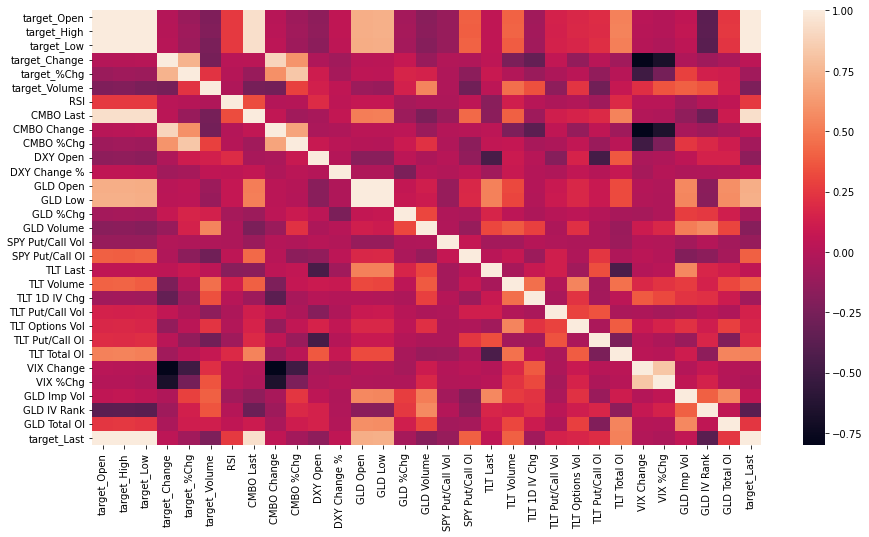

In [5]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr())

In [15]:
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values
y = y.reshape(y.shape[0],-1)

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,shuffle=True)

In [17]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [38]:
# pickle.dump(scaler, open('scaler.pkl', 'wb'))

In [18]:
X.max()

22.27518105799849

In [19]:
X.min()

-9.139676411334268

# PREDCTION

### XGBOOST REGRESSOR

In [20]:
model = XGBRegressor(base_score=0.5, booster='gbtree',
                     gamma=0, gpu_id=-1, grow_policy='depthwise',
                    max_depth=6, max_leaves=0, min_child_weight=1,
                    n_estimators=100, n_jobs=0,num_parallel_tree=1,
                     predictor='auto', random_state=0, reg_alpha=0,
                     reg_lambda=1,)

In [21]:
model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [22]:
preds = model.predict(X_test)

In [25]:
mean_absolute_error(y_test,preds)

0.022859166182455676

In [39]:
mean_absolute_error(y_test,preds)

0.022859166182455676

In [40]:
mean_squared_error(y_test,preds)

0.0009844906011289235

In [30]:
a = data.iloc[0,:-1].values

In [41]:
# a.shape

In [36]:
model.predict(scaler.transform([a]))

array([0.474836], dtype=float32)

In [51]:
result = data[["target_Last"]]

In [53]:
result["Prediction"] = model.predict(X)

/tmp/ipykernel_5215/1575106349.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result["Prediction"] = model.predict(X)


In [54]:
result

,target_Last,Prediction
2022-09-16,0.474400,0.448635
2022-09-15,0.542672,0.522572
2022-09-14,0.609747,0.546723
2022-09-13,0.587289,0.550605
2022-09-09,0.789410,0.725086
...,...,...
2018-10-17,-1.099298,-1.121140
2018-10-16,-1.100047,-1.107957
2018-10-15,-1.189878,-1.224024
2018-10-12,-1.166672,-1.181312


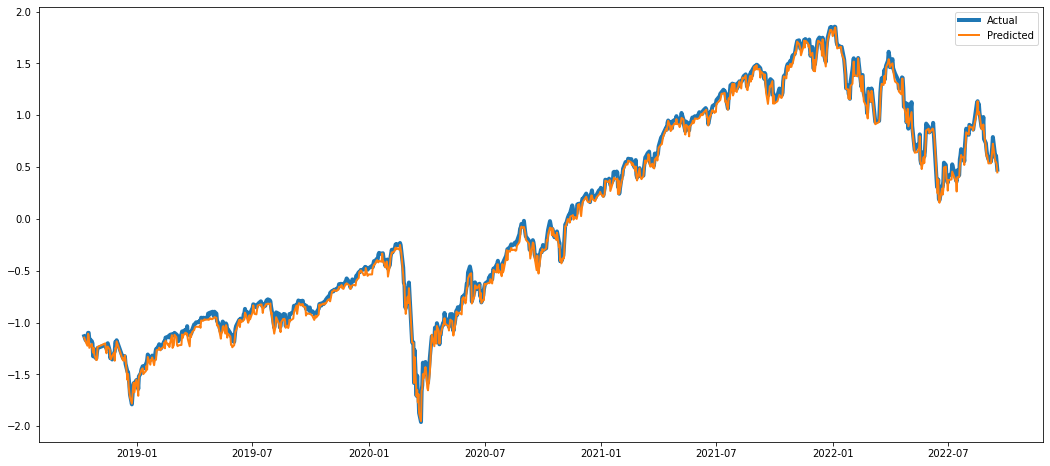

In [56]:
plt.figure(figsize=(18,8))
plt.plot(result[["target_Last"]],label = "Actual",lw=4)
plt.plot(result[["Prediction"]] , label = "Predicted",lw = 2)
plt.legend()

In [20]:
# filename = 'predictor.sav'
# pickle.dump(model, open(filename, 'wb'))